In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from scipy.stats import zscore

data = pd.read_csv("data/train.csv")
data = data.dropna()

data

2024-02-06 19:39:49.116669: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-06 19:39:49.140945: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 19:39:49.140974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 19:39:49.141718: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-06 19:39:49.146051: I tensorflow/core/platform/cpu_feature_guar

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
def convert_to_2d(data):
    new_data = list()
    for index, row in data.iterrows():
        new_row = np.array(row).reshape(28,28)
        new_data.append(new_row)
    new_data = np.array(new_data)
    return new_data

In [3]:
trainsplit = 1
s = data.shape[0]
xdata = data.iloc[:,1:]
ydata = data.iloc[:,0]

xdata = xdata.apply(zscore)
xdata = xdata.fillna(0)

xtrain = xdata.iloc[:int(trainsplit*s),:]
ytrain = ydata[:int(trainsplit*s)]

xtest = xdata.iloc[int(trainsplit*s):]
ytest = ydata[int(trainsplit*s):]

datasets = [xtrain, xtest]

In [4]:
tf.convert_to_tensor(convert_to_2d(xtrain))
xtrain, xtest = [tf.convert_to_tensor(convert_to_2d(dataset)) for dataset in datasets]

In [5]:
xtrain.shape

TensorShape([42000, 28, 28])

In [6]:
ytrain.shape

(42000,)

In [11]:
model = tf.keras.Sequential([
    layers.Conv2D(20, 3, activation='relu', input_shape=(28, 28, 1)),
    # layers.Conv2D(10, 3, activation='softmax', input_shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(10, "softmax")
    
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(xtrain, ytrain, epochs = 10,validation_split = 0.2)

Epoch 1/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2423 - accuracy: 0.9305 - val_loss: 0.1356 - val_accuracy: 0.9617
Epoch 2/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0952 - accuracy: 0.9727 - val_loss: 0.1194 - val_accuracy: 0.9679
Epoch 3/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0614 - accuracy: 0.9817 - val_loss: 0.1057 - val_accuracy: 0.9726
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.1342 - val_accuracy: 0.9667
Epoch 5/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0318 - accuracy: 0.9906 - val_loss: 0.1214 - val_accuracy: 0.9707
Epoch 6/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0226 - accuracy: 0.9934 - val_loss: 0.1253 - val_accuracy: 0.9725
Epoch 7/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.1221 - val_accuracy:

<AxesSubplot:>

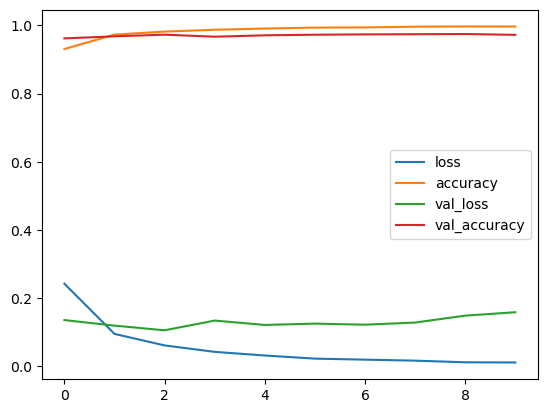

In [12]:
his = pd.DataFrame(history.history)
his.plot()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 10)                216330    
                                                                 
Total params: 216650 (846.29 KB)
Trainable params: 216650 (846.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
results = model.evaluate(xtrain, ytrain)
print(results)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0421 - accuracy: 0.9915
[0.042062483727931976, 0.9915476441383362]


In [10]:
results = model.evaluate(xtest, ytest)
print(results)

ValueError: Expected input data to be non-empty.

In [ ]:
ttestdata = pd.read_csv("data/test.csv")
testdata

In [ ]:
data = data.dropna()
data = data.apply(zscore)
data = data.fillna(0)
xtest = data

In [ ]:
xtest

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision
# import numpy as np
# import pandas as pd


# data = pd.read_csv("data/train.csv")
# x_data = torch.tensor(data.iloc[:,1:].values)
# y_data = torch.tensor(data.iloc[:,0].values)


# class MyModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.hl1 = nn.Linear(50, 784)
#         self.hl2 = nn.Linear(25, 50)
#         self.hl3 = nn.Linear(1, 25)
        
#     def forward(self, x):
#         x = self.hl1(x)
#         x = self.hl2(x)
#         x = self.hl3(x)
#         return x

# model = MyModel()
# loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.8)

# n_epochs = 1000
# for epoch in range(n_epochs):
#     # forward, backward, and then weight update
#     y_pred = model(x_data)
#     loss = loss_fn(y_pred, y_data)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

# test_data = pd.read_csv("data/test.csv")
# final = test_data.shape[0]
# correct = (predicted == target_tensor).sum()
# print('- Accuracy: %f %%' % (100 * float(correct) / final))
# print('- CE : %2.2f, KL : %2.2f' % (cross_entropy.item(), kl.item()))
